In [103]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.naive_bayes
import sklearn.ensemble as ske
import sklearn.neighbors
import sklearn.pipeline
import sklearn.linear_model
import joblib
from sklearn import preprocessing
from sklearn import tree, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, PowerTransformer, MinMaxScaler
import sys
import sqlite3
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [104]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Activation, Flatten, Input, Multiply, Dropout, GlobalMaxPooling1D, GlobalAveragePooling1D, AveragePooling1D, LeakyReLU
from keras.models import Sequential, Model #for keras sequential model
from keras import optimizers

In [105]:
# !pip install gdown
# !wget https://drive.usercontent.google.com/download?id=1stVX2-APaiH9XvXhVpySMkRmnLqsSCLM&authuser=0&confirm=t&uuid=e7ebc783-31ef-4c4d-8742-25550c4cb87d&at=APZUnTWoVbSlzfbVCxuJdDkIL1KS%3A1705048605866
# import requests
# URL = "https://drive.usercontent.google.com/download?id=1stVX2-APaiH9XvXhVpySMkRmnLqsSCLM&authuser=0&confirm=t&uuid=e7ebc783-31ef-4c4d-8742-25550c4cb87d&at=APZUnTWoVbSlzfbVCxuJdDkIL1KS%3A1705048605866"
# response = requests.get(URL)
# open("wild.pickle", "wb").write(response.content)

In [106]:
df_wild = pd.read_pickle('../input/wild-pickle/wild.pickle')

In [107]:
MAX_LENGTH = int(1e6)
prev_size = len(df_wild)
df_wild = df_wild[df_wild['generic_fileSize'] <= MAX_LENGTH]
print("considering samples with size less than {} bytes, {} ----> {}".format(MAX_LENGTH, prev_size, len(df_wild)))

considering samples with size less than 1000000 bytes, 50724 ----> 37354


In [108]:
# LABELS = ['sample_sha1', 'unpacked_sample_sha1', 'unpacked_sample_id', 'packed', 'packer_name', 'source', 'benign',
#           'malicious', 'similarity', 'benign_vt', 'malicious_vt', 'dpi_cmpx', 'corrupted', 'most_similar_sha1',
#           'unpacked_similarity', 'packed_static_manalyze']

# for col in df_wild.columns:
#     if col in LABELS:
#         continue
#     dtype = df_wild[col].dtype
#     if dtype == object:
#         le = preprocessing.LabelEncoder()
#         df_wild[col] = le.fit_transform(df_wild[col])

In [109]:
df_wild.head()

,sample_sha1,benign,malicious,packed,unpacked_sample_sha1,unpacked_sample_id,packer_name,imp_setupremovefilelogentrya,imp_vardeccmp,imp_setdlgitemint,...,opcode_xor sub mov,opcode_xor sub mov add,opcode_xor test,opcode_xor test je,opcode_xor xor,opcode_xor xor mov,opcode_xor xor pop,opcode_xor xor pop mov,opcode_xor xor xor,opcode_xor xor xor pop
1,a2aac23e17be570c647fd22080e05b0e58449565,True,False,True,-1,-1,none,False,False,False,...,0.000022,0.0,0.000088,0.000084,0.000070,0.000066,0.000028,0.0,0.000053,0.0
2,c3aa534bbd20f3a3dd8e7a457f625291af9d0fe4,False,True,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.000309,0.000000,0.000000,0.0,0.000331,0.0
10,15cb9eab6b0f0ccd718a9235f07046dff100789f,False,True,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
12,8792cf08950abada1572b47948e86c9fce26c01a,True,False,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
13,353a955ae9919f7b639d74394e3c1149f0189362,True,False,True,-1,-1,none,False,False,False,...,0.000000,0.0,0.000204,0.000190,0.000066,0.000091,0.000000,0.0,0.000000,0.0


In [110]:
print(df_wild.shape)

(37354, 56555)


In [111]:
#Chọn ngẫu nhiên 1,200 mẫu
df = df_wild.sample(n=1200, random_state=102)

In [112]:
df = df.drop(['benign','unpacked_sample_id'], axis=1)
df = df.drop(['benign_vt','malicious_vt'], axis=1)

In [113]:
string_columns = df.select_dtypes(include=['object']).columns
df = df.drop(string_columns, axis=1)

In [114]:
labels = list(df.select_dtypes(include=['bool']).columns.values)
df[labels] = df[labels].apply(LabelEncoder().fit_transform)

In [115]:
df.head()

,malicious,packed,imp_setupremovefilelogentrya,imp_vardeccmp,imp_setdlgitemint,imp_?append@?$basic_string@du?$char_traits@d@std@@v?$allocator@d@2@@std@@qaeaav12@abv12@ii@z,imp_zwwritefile,imp_glstencilop,imp_comparelinkinforeferents,imp__setmbcp,...,opcode_xor sub mov,opcode_xor sub mov add,opcode_xor test,opcode_xor test je,opcode_xor xor,opcode_xor xor mov,opcode_xor xor pop,opcode_xor xor pop mov,opcode_xor xor xor,opcode_xor xor xor pop
32148,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000187,0.000198,0.0,0.0,0.0,0.0,0.0,0.0
210953,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50313,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
200288,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
49579,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
print(df.shape)

(1200, 56526)


In [117]:
df_train = df.sample(n=1000, random_state=102)
df_test = df.drop(df_train.index)

In [118]:
data = df_train.sample(n=500, random_state=102)

In [119]:
#Kiểm tra số lượng mẫu
UB = data[(data['malicious'] == False) & (data['packed'] == False)].shape[0]
PM = data[(data['malicious'] == True) & (data['packed'] == True)].shape[0]
PB = data[(data['malicious'] == False) & (data['packed'] == True)].shape[0]
print('Unpacked Benign: %i samples' % UB)
print('Packed Malware: %i samples' % PM)
print('Packed Benign: %i samples' % PB)
print('Total TRAIN set: %i samples'% (UB+PM+PB))

Unpacked Benign: 39 samples
Packed Malware: 363 samples
Packed Benign: 98 samples
Total TRAIN set: 500 samples


In [120]:
#Chia tỉ lệ 50 - 50
data_PM = data[(data['malicious'] == True) & (data['packed'] == True)].sample(n=(PM-(UB+PB)), random_state=102)
data = data.drop(data_PM.index)

In [121]:
#Số lượng tập train
UB = data[(data['malicious'] == False) & (data['packed'] == False)].shape[0]
PM = data[(data['malicious'] == True) & (data['packed'] == True)].shape[0]
PB = data[(data['malicious'] == False) & (data['packed'] == True)].shape[0]
print('Unpacked Benign: %i samples' % UB)
print('Packed Malware: %i samples' % PM)
print('Packed Benign: %i samples' % PB)
print('Total TRAIN set: %i samples'% (UB+PM+PB))

Unpacked Benign: 39 samples
Packed Malware: 137 samples
Packed Benign: 98 samples
Total TRAIN set: 274 samples


In [122]:
# data = data + 1e-6
# data_columns = data.select_dtypes(exclude=['malicious','packed']).columns.tolist()
scaler = MinMaxScaler(feature_range=(-1, 1))
data.iloc[:,2:(data.shape[1]-1)] = scaler.fit_transform(data.iloc[:,2:(data.shape[1]-1)])

In [123]:
data

,malicious,packed,imp_setupremovefilelogentrya,imp_vardeccmp,imp_setdlgitemint,imp_?append@?$basic_string@du?$char_traits@d@std@@v?$allocator@d@2@@std@@qaeaav12@abv12@ii@z,imp_zwwritefile,imp_glstencilop,imp_comparelinkinforeferents,imp__setmbcp,...,opcode_xor sub mov,opcode_xor sub mov add,opcode_xor test,opcode_xor test je,opcode_xor xor,opcode_xor xor mov,opcode_xor xor pop,opcode_xor xor pop mov,opcode_xor xor xor,opcode_xor xor xor pop
209017,0,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-0.930743,-0.189571,-0.985126,-1.000000,-1.0,-1.0,-1.000000,0.0
40823,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,0.0
194679,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-0.935402,-0.198689,-0.994304,-1.000000,-1.0,-1.0,-1.000000,0.0
22745,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,0.0
2145,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178937,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,0.0
32924,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,0.0
198056,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-0.870850,0.652603,-1.000000,-1.000000,-1.0,-1.0,-1.000000,0.0
7669,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-0.717083,-1.0,-0.965680,-0.711743,-0.986489,-0.923192,-1.0,-1.0,-0.939126,0.0


In [124]:
# df_test_columns = df_test.select_dtypes(exclude=['malicious','packed']).columns.tolist()
# ddd = df_test
scaler = MinMaxScaler(feature_range=(-1, 1))
df_test.iloc[:,2:df_test.shape[1]-1] = scaler.fit_transform(df_test.iloc[:,2:df_test.shape[1]-1])

In [125]:
df_test

,malicious,packed,imp_setupremovefilelogentrya,imp_vardeccmp,imp_setdlgitemint,imp_?append@?$basic_string@du?$char_traits@d@std@@v?$allocator@d@2@@std@@qaeaav12@abv12@ii@z,imp_zwwritefile,imp_glstencilop,imp_comparelinkinforeferents,imp__setmbcp,...,opcode_xor sub mov,opcode_xor sub mov add,opcode_xor test,opcode_xor test je,opcode_xor xor,opcode_xor xor mov,opcode_xor xor pop,opcode_xor xor pop mov,opcode_xor xor xor,opcode_xor xor xor pop
200288,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,0.0
159927,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,0.0
184152,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,0.0
22222,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,0.0
192299,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,0.0
199929,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,0.0
172394,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,1.000000,-1.0,-1.000000,-1.000000,-0.677331,-0.70619,-1.0,-1.0,-1.000000,0.0
178517,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-0.488347,-1.0,-0.663461,0.794634,-0.762579,-1.00000,-1.0,-1.0,-0.724968,0.0


In [126]:
#Xử lý tập train
y = data['malicious'].values
data = data.drop(['malicious','packed'], axis=1)

In [127]:
UB = df_test[(df_test['malicious'] == False) & (df_test['packed'] == False)].shape[0]
PM = df_test[(df_test['malicious'] == True) & (df_test['packed'] == True)].shape[0]
PB = df_test[(df_test['malicious'] == False) & (df_test['packed'] == True)].shape[0]

df_test_PM = df_test[(df_test['malicious'] == True) & (df_test['packed'] == True)].sample(n=(PM-(UB+PB)), random_state=102)
df_test = df_test.drop(df_test_PM.index)

UB = df_test[(df_test['malicious'] == False) & (df_test['packed'] == False)].shape[0]
PM = df_test[(df_test['malicious'] == True) & (df_test['packed'] == True)].shape[0]
PB = df_test[(df_test['malicious'] == False) & (df_test['packed'] == True)].shape[0]

print('Unpacked Benign: %i samples' % UB)
print('Packed Malware: %i samples' % PM)
print('Packed Benign: %i samples' % PB)
print('Total TEST set: %i samples'% (UB+PM+PB))

Unpacked Benign: 10 samples
Packed Malware: 46 samples
Packed Benign: 36 samples
Total TEST set: 92 samples


In [128]:
fsel = SelectKBest(score_func=mutual_info_classif, k=333)
fsel.fit(data, y)
features = fsel.get_support(indices = True)
features = list(data.columns[features])

In [129]:
# model = SelectFromModel(fsel, prefit=True)
# X = model.transform(data)

X_train = fsel.transform(data)
X_test = fsel.transform(df_test.drop(['malicious','packed'], axis=1))

# Lấy tên đặc trưng tương ứng cho X_train và X_test
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

y_train = y
y_test = df_test['malicious'].values

In [130]:
X_train

,header_AddressOfEntryPoint,api_import_nb,pesection_3_size,pesection_2_physicalAddress,pesection_2_virtualSize,pesection_3_virtualSize,pesection_2_size,pesection_2_entropy,header_SizeOfInitializedData,pesection_2_virtualAddress,...,opcode_inc,opcode_inc add,opcode_lea,opcode_mov,opcode_mov mov,opcode_push,opcode_push push,opcode_ret,opcode_sub,opcode_xor
0,-0.997658,-0.734940,-0.997082,-0.998571,-0.998571,-0.996655,-0.998552,-0.264461,-0.999992,-0.995643,...,-0.967258,-0.980651,-0.920602,-0.992020,-0.943403,-0.996831,-0.929660,-0.956974,-0.978076,-0.980445
1,-0.992020,-0.484337,0.995657,-0.842113,-0.842113,-0.980000,-0.998842,-0.872597,-0.999992,-0.997790,...,-1.000000,-1.000000,-1.000000,-0.962581,-1.000000,-0.984324,-1.000000,-0.689395,-1.000000,-1.000000
2,-1.000000,0.132530,-1.000000,-0.972222,-0.972222,-1.000000,-0.972206,0.040247,-0.999680,-0.968622,...,-0.982679,-0.985993,-0.957110,-0.995208,-0.965612,-0.998063,-0.956281,-0.971716,-0.986120,-0.987816
3,-0.553709,-0.913253,-0.952226,-0.240741,-0.240741,-0.940000,-0.246091,0.999804,-0.999974,-0.960225,...,0.661380,-1.000000,-1.000000,-1.000000,-1.000000,-0.890842,-1.000000,-1.000000,0.100418,0.049287
4,-0.562909,-0.918072,-0.952226,-0.259259,-0.259259,-0.940000,-0.258830,0.999840,-0.999974,-0.961109,...,-1.000000,-1.000000,-1.000000,-0.362827,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,-0.934674,-0.990361,-1.000000,-0.993056,-0.993056,-1.000000,-0.994097,0.450986,-0.999996,-0.991382,...,-0.856664,-1.000000,-0.740414,-0.967500,-0.770852,-0.989463,-0.794274,-0.915073,-0.917728,-0.948768
270,-0.965873,-0.431325,-0.992400,-0.985786,-0.985786,-0.991787,-0.993052,-0.182712,-0.999959,-0.989614,...,-0.169876,0.149949,-0.555686,-0.965491,-1.000000,-0.985543,-1.000000,-1.000000,-0.854256,-0.861027
271,-0.999718,-0.812048,-0.998914,-0.166630,-0.166630,-0.998984,-0.165026,0.686288,-0.999588,-0.999337,...,-1.000000,-1.000000,-0.819900,-0.981388,-0.869494,-0.995051,-0.904650,-0.900754,-0.941766,-0.957765
272,-0.971936,-0.253012,-0.947883,-0.955485,-0.955485,-0.894316,-0.953677,0.682008,-0.999919,-0.994255,...,-0.984402,-0.986299,-0.963507,-0.996510,-0.975574,-0.998575,-0.968046,-0.978838,-0.989913,-0.989128


In [131]:
X_test

,header_AddressOfEntryPoint,api_import_nb,pesection_3_size,pesection_2_physicalAddress,pesection_2_virtualSize,pesection_3_virtualSize,pesection_2_size,pesection_2_entropy,header_SizeOfInitializedData,pesection_2_virtualAddress,...,opcode_inc,opcode_inc add,opcode_lea,opcode_mov,opcode_mov mov,opcode_push,opcode_push push,opcode_ret,opcode_sub,opcode_xor
0,-0.975782,-0.993344,-1.000000,-0.992219,-0.992219,-1.000000,-0.990698,0.451114,-0.996790,-0.971831,...,-0.990777,-1.000000,-0.791965,-0.992125,-0.988032,-0.876697,-0.806174,-0.915073,-0.917728,-0.894401
1,-0.975782,-0.993344,-1.000000,-0.992219,-0.992219,-1.000000,-0.990698,0.451114,-0.996790,-0.971831,...,-0.990777,-1.000000,-0.791965,-0.992125,-0.988032,-0.876697,-0.806174,-0.915073,-0.917728,-0.894401
2,-0.999752,-0.970050,-0.989595,-0.944477,-0.944477,-0.988831,-1.000000,-1.000000,-0.979133,-0.865415,...,-1.000000,-1.000000,-1.000000,-0.847756,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,-0.966270,0.071547,-0.981503,-0.899036,-0.899036,-0.944670,-0.854015,0.236664,-0.932584,-0.881064,...,-0.998958,-0.987189,-0.968071,-0.999061,-0.998594,-0.981674,-0.967766,-0.975296,-0.989235,-0.976560
4,-0.999574,-0.747088,-0.978035,-0.998460,-0.998460,-0.977135,-0.996350,-0.823713,-0.776083,-0.809077,...,-0.999296,-0.996988,-0.978317,-0.999360,-0.998965,-0.990425,-0.985081,-0.984607,-0.991982,-0.984791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.983880,-0.963394,-1.000000,-0.989625,-0.989625,-0.990020,-0.998175,0.007002,-0.991172,-0.965571,...,-1.000000,-1.000000,-1.000000,-0.953231,-1.000000,-0.053757,-1.000000,-0.328612,-0.108619,-1.000000
88,-0.872511,-0.986689,-0.980347,-0.917000,-0.917000,-0.970059,-0.885036,0.988415,-0.990369,-0.887324,...,-1.000000,-1.000000,-1.000000,-0.958224,-1.000000,-0.487392,-1.000000,-1.000000,-1.000000,0.075766
89,-0.993387,-0.743760,-0.998844,-0.999552,-0.999552,-0.998928,-0.998175,-0.455314,-0.994382,-0.987480,...,-0.996799,-1.000000,-0.916638,-0.997364,-0.996251,-0.946573,-0.907230,-0.941472,-0.969348,-0.937660
90,-0.992475,-0.673877,-0.991908,-0.999630,-0.999630,-0.985680,-0.998175,-0.548870,-0.989567,-0.981221,...,-0.998024,-0.990442,-0.941288,-0.998275,-0.997591,-0.963407,-0.935416,-0.958172,-0.978163,-0.958017


In [136]:
data_gan = pd.concat([pd.DataFrame(y_train, columns=['malicious']), X_train], axis=1)
data_gan

,malicious,header_AddressOfEntryPoint,api_import_nb,pesection_3_size,pesection_2_physicalAddress,pesection_2_virtualSize,pesection_3_virtualSize,pesection_2_size,pesection_2_entropy,header_SizeOfInitializedData,...,opcode_inc,opcode_inc add,opcode_lea,opcode_mov,opcode_mov mov,opcode_push,opcode_push push,opcode_ret,opcode_sub,opcode_xor
0,0,-0.997658,-0.734940,-0.997082,-0.998571,-0.998571,-0.996655,-0.998552,-0.264461,-0.999992,...,-0.967258,-0.980651,-0.920602,-0.992020,-0.943403,-0.996831,-0.929660,-0.956974,-0.978076,-0.980445
1,0,-0.992020,-0.484337,0.995657,-0.842113,-0.842113,-0.980000,-0.998842,-0.872597,-0.999992,...,-1.000000,-1.000000,-1.000000,-0.962581,-1.000000,-0.984324,-1.000000,-0.689395,-1.000000,-1.000000
2,1,-1.000000,0.132530,-1.000000,-0.972222,-0.972222,-1.000000,-0.972206,0.040247,-0.999680,...,-0.982679,-0.985993,-0.957110,-0.995208,-0.965612,-0.998063,-0.956281,-0.971716,-0.986120,-0.987816
3,0,-0.553709,-0.913253,-0.952226,-0.240741,-0.240741,-0.940000,-0.246091,0.999804,-0.999974,...,0.661380,-1.000000,-1.000000,-1.000000,-1.000000,-0.890842,-1.000000,-1.000000,0.100418,0.049287
4,0,-0.562909,-0.918072,-0.952226,-0.259259,-0.259259,-0.940000,-0.258830,0.999840,-0.999974,...,-1.000000,-1.000000,-1.000000,-0.362827,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1,-0.934674,-0.990361,-1.000000,-0.993056,-0.993056,-1.000000,-0.994097,0.450986,-0.999996,...,-0.856664,-1.000000,-0.740414,-0.967500,-0.770852,-0.989463,-0.794274,-0.915073,-0.917728,-0.948768
270,0,-0.965873,-0.431325,-0.992400,-0.985786,-0.985786,-0.991787,-0.993052,-0.182712,-0.999959,...,-0.169876,0.149949,-0.555686,-0.965491,-1.000000,-0.985543,-1.000000,-1.000000,-0.854256,-0.861027
271,1,-0.999718,-0.812048,-0.998914,-0.166630,-0.166630,-0.998984,-0.165026,0.686288,-0.999588,...,-1.000000,-1.000000,-0.819900,-0.981388,-0.869494,-0.995051,-0.904650,-0.900754,-0.941766,-0.957765
272,0,-0.971936,-0.253012,-0.947883,-0.955485,-0.955485,-0.894316,-0.953677,0.682008,-0.999919,...,-0.984402,-0.986299,-0.963507,-0.996510,-0.975574,-0.998575,-0.968046,-0.978838,-0.989913,-0.989128


In [137]:
X_train_gan = data_gan[data_gan['malicious'] == 1].drop(['malicious'], axis = 1)
y_train_gan = y_train[y_train==1]

In [138]:
X_train_gan.reset_index(inplace=True, drop=True)

In [139]:
# Định nghĩa GAN
import os
import logging
import numpy as np
import pandas as pd
import tensorflow as tf

tf.get_logger().setLevel(logging.ERROR)


class Gan():

    def __init__(self, data):

        self.data = data
        self.n_epochs = 300

    # Genereta random noise in a latent space
    def _noise(self):
        noise = np.random.normal(0, 1, self.data.shape)
        return noise
    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(15, activation=LeakyReLU(alpha=0.2),
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(30, activation=LeakyReLU(alpha=0.2)))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(60, activation=LeakyReLU(alpha=0.2)))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(
            self.data.shape[1], activation='tanh'))
        return model
    def _discriminator(self):
        model = tf.keras.Sequential(name="Discriminator_model")
        model.add(tf.keras.layers.Dense(60, activation=LeakyReLU(alpha=0.2),
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.Dense(30, activation=LeakyReLU(alpha=0.2)))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.Dense(15, activation=LeakyReLU(alpha=0.2)))
        model.add(tf.keras.layers.Dropout(0.2))
        # sigmoid => real or fake
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model
    
    # define the combined generator and discriminator model,
    # for updating the generator
    def _GAN(self, generator, discriminator):
        discriminator.trainable = False
#         generator.trainable = True
        model = tf.keras.Sequential(name="GAN")
        model.add(generator)
        model.add(discriminator)
        model.compile(loss='binary_crossentropy', optimizer='adam')
        return model
    # Hàm vẽ loss function
    def plot_loss(self, losses):
        d_loss = [v for v in losses["D"]]
        g_loss = [v for v in losses["G"]]

        plt.figure(figsize=(8,6))
        plt.plot(d_loss, label="Discriminator loss")
        plt.plot(g_loss, label="Generator loss")

        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    # train the generator and discriminator
    
    def train(self, generator, discriminator, gan, losses):

        # determine half the size of one batch, for updating the  discriminator
        # manually enumerate epochs
        for epoch in range(self.n_epochs):
            # Train the discriminator
            generated_data = generator.predict(self._noise(),verbose = 0)
            labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
            X = np.concatenate([self.data, generated_data])
            discriminator.trainable = True
            d_loss , _ = discriminator.train_on_batch(X, labels)
            # Train the generator
            discriminator.trainable = False
            noise = self._noise()
            g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))

            losses["D"].append(d_loss)
            losses["G"].append(g_loss)
            if (epoch+1)%50==0:
                print('epoch:%d, d_loss=%.3f, g_loss=%.3f' %(epoch+1, d_loss, g_loss))
        self.plot_loss(losses)
        return generator

In [140]:
# import os
# import logging
# import numpy as np
# import pandas as pd
# import tensorflow as tf

# tf.get_logger().setLevel(logging.ERROR)


# class Gan():

#     def __init__(self, data):


#         self.data = data
#         self.n_epochs = 200

#     # Genereta random noise in a latent space
#     def _noise(self):
#         noise = np.random.normal(0, 1, self.data.shape)
#         return noise

#     def _generator(self):
#         model = tf.keras.Sequential(name="Generator_model")
#         model.add(tf.keras.layers.Dense(15, activation='relu',
#                                         kernel_initializer='he_uniform',
#                                         input_dim=self.data.shape[1]))
#         model.add(tf.keras.layers.Dense(30, activation='relu'))
#         model.add(tf.keras.layers.Dense(
#             self.data.shape[1], activation='tanh'))
#         return model

#     def _discriminator(self):
#         model = tf.keras.Sequential(name="Discriminator_model")
#         model.add(tf.keras.layers.Dense(30, activation='relu',
#                                         kernel_initializer='he_uniform',
#                                         input_dim=self.data.shape[1]))
#         model.add(tf.keras.layers.Dense(15, activation='relu'))
#         # sigmoid => real or fake
#         model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#         model.compile(loss='binary_crossentropy',
#                       optimizer='adam',
#                       metrics=['accuracy'])

#         return model

#     # define the combined generator and discriminator model,
#     # for updating the generator
#     def _GAN(self, generator, discriminator):
#         discriminator.trainable = False
#         generator.trainable = True
#         model = tf.keras.Sequential(name="GAN")
#         model.add(generator)
#         model.add(discriminator)
#         model.compile(loss='binary_crossentropy', optimizer='adam')
#         return model
#     # Hàm vẽ loss function
#     def plot_loss(self, losses):
#         d_loss = [v for v in losses["D"]]
#         g_loss = [v for v in losses["G"]]

#         plt.figure(figsize=(8,6))
#         plt.plot(d_loss, label="Discriminator loss")
#         plt.plot(g_loss, label="Generator loss")

#         plt.xlabel('Epochs')
#         plt.ylabel('Loss')
#         plt.legend()
#         plt.show()
#     # train the generator and discriminator
#     def train(self, generator, discriminator, gan, losses):

#         # determine half the size of one batch, for updating the  discriminator
#         # manually enumerate epochs
#         for epoch in range(self.n_epochs):
            
#             # Train the discriminator
#             generated_data = generator.predict(self._noise(), verbose=0)
#             labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
#             X = np.concatenate([self.data, generated_data])
#             discriminator.trainable = True
#             d_loss , _ = discriminator.train_on_batch(X, labels)

#             # Train the generator
#             noise = self._noise()
#             g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))

#             losses["D"].append(d_loss)
#             losses["G"].append(g_loss)
#             if (epoch+1)%50==0:
#                 print('epoch:%d, d_loss=%.3f, g_loss=%.3f' %(epoch+1, d_loss, g_loss))
#         self.plot_loss(losses)
#         return generator

Model: "Generator_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 15)                5010      
                                                                 
 dropout_8 (Dropout)         (None, 15)                0         
                                                                 
 batch_normalization_3 (Bat  (None, 15)                60        
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 30)                480       
                                                                 
 dropout_9 (Dropout)         (None, 30)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 30)                120       
 chNormalization)                                  

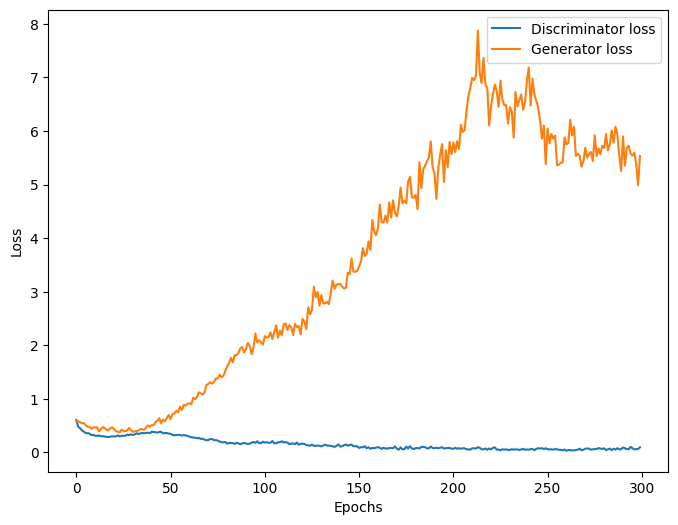

In [141]:
losses = {"D":[], "G":[]}
model = Gan(data=X_train_gan)
generator = model._generator()
generator.summary()
descriminator = model._discriminator()
descriminator.summary()
gan_model = model._GAN(generator=generator, discriminator=descriminator)
trained_model = model.train(
    generator=generator, discriminator=descriminator, gan=gan_model, losses=losses)

In [142]:
X_train_gen = trained_model.predict(X_train_gan)
X_train_gen = pd.DataFrame(X_train_gen, columns=X_train_gan.columns.tolist())

5/5 [==============================] - 0s 3ms/step


In [145]:
X_train_gan

,header_AddressOfEntryPoint,api_import_nb,pesection_3_size,pesection_2_physicalAddress,pesection_2_virtualSize,pesection_3_virtualSize,pesection_2_size,pesection_2_entropy,header_SizeOfInitializedData,pesection_2_virtualAddress,...,opcode_inc,opcode_inc add,opcode_lea,opcode_mov,opcode_mov mov,opcode_push,opcode_push push,opcode_ret,opcode_sub,opcode_xor
0,-1.000000,0.132530,-1.000000,-0.972222,-0.972222,-1.000000,-0.972206,0.040247,-0.999680,-0.968622,...,-0.982679,-0.985993,-0.957110,-0.995208,-0.965612,-0.998063,-0.956281,-0.971716,-0.986120,-0.987816
1,-0.998684,-0.638554,-0.539631,-0.974765,-0.974765,-0.460322,-0.972206,0.502284,-0.999582,-0.996685,...,-0.937467,-0.921933,-0.817487,-0.975073,-0.821731,-0.990850,-0.810766,-0.883417,-0.933058,-0.946431
2,-0.986247,-0.990361,-1.000000,-0.993056,-0.993056,-1.000000,-0.994097,0.450986,-0.999996,-0.998011,...,-0.856664,-1.000000,-0.740414,-0.967500,-0.770852,-0.989463,-0.794274,-0.915073,-0.917728,-0.948768
3,-0.997739,-0.503614,-0.973941,-0.990415,-0.990415,-0.979854,-0.990735,-1.000000,-0.999979,-0.991824,...,-1.000000,-1.000000,-0.677522,-0.941652,-0.722714,-0.974107,-0.741654,-0.877209,-1.000000,-1.000000
4,-0.999718,-0.812048,-0.998914,-0.166630,-0.166630,-0.998984,-0.165026,0.686214,-0.999588,-0.999337,...,-1.000000,-1.000000,-0.819900,-0.981388,-0.869494,-0.995051,-0.904650,-0.900754,-0.941766,-0.957765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,-0.923287,-1.000000,-1.000000,-0.989954,-0.989954,-1.000000,-0.989577,0.497713,-0.999995,-0.988289,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
133,-0.999758,-0.633735,-0.979370,-0.998626,-0.998626,-0.977090,-0.997684,-0.823728,-0.999702,-0.986521,...,-0.989053,-0.995657,-0.972944,-0.997360,-0.980181,-0.999182,-0.984165,-0.984607,-0.991982,-0.992621
134,-0.934674,-0.990361,-1.000000,-0.993056,-0.993056,-1.000000,-0.994097,0.450986,-0.999996,-0.991382,...,-0.856664,-1.000000,-0.740414,-0.967500,-0.770852,-0.989463,-0.794274,-0.915073,-0.917728,-0.948768
135,-0.999718,-0.812048,-0.998914,-0.166630,-0.166630,-0.998984,-0.165026,0.686288,-0.999588,-0.999337,...,-1.000000,-1.000000,-0.819900,-0.981388,-0.869494,-0.995051,-0.904650,-0.900754,-0.941766,-0.957765


In [146]:
X_train_gen

,header_AddressOfEntryPoint,api_import_nb,pesection_3_size,pesection_2_physicalAddress,pesection_2_virtualSize,pesection_3_virtualSize,pesection_2_size,pesection_2_entropy,header_SizeOfInitializedData,pesection_2_virtualAddress,...,opcode_inc,opcode_inc add,opcode_lea,opcode_mov,opcode_mov mov,opcode_push,opcode_push push,opcode_ret,opcode_sub,opcode_xor
0,-0.694593,-0.467040,-0.048337,-0.397078,-0.470708,-0.468235,0.264286,0.605652,-0.292483,-0.811630,...,-0.065588,-0.762201,-0.544056,-0.690906,-0.211823,-0.786823,-0.391153,-0.528588,-0.453607,-0.716248
1,-0.625877,-0.465951,-0.136088,-0.434303,-0.528827,-0.533027,0.184424,0.481649,-0.295822,-0.819542,...,-0.032264,-0.762441,-0.568042,-0.655920,-0.156462,-0.773527,-0.494704,-0.575739,-0.486067,-0.684641
2,-0.354297,-0.472969,-0.215441,-0.369454,-0.506651,-0.607947,0.205525,0.466588,-0.334464,-0.789847,...,0.423741,-0.770209,-0.626168,-0.464394,0.199017,-0.764253,-0.680618,-0.516279,-0.437118,-0.458859
3,0.118747,-0.482321,-0.330852,-0.282642,-0.517839,-0.672941,0.222842,0.267080,-0.332872,-0.752924,...,0.675603,-0.748511,-0.666773,-0.092464,0.505812,-0.711557,-0.795599,-0.464168,-0.344803,-0.085817
4,-0.235327,-0.457711,-0.251903,-0.386177,-0.557976,-0.644483,0.180218,0.461745,-0.363456,-0.783295,...,0.532171,-0.791616,-0.683215,-0.417580,0.270092,-0.780065,-0.762526,-0.510654,-0.478356,-0.348911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,-0.521251,-0.485942,-0.159874,-0.378394,-0.495015,-0.553354,0.256476,0.497686,-0.305544,-0.793613,...,0.271527,-0.761312,-0.587939,-0.536510,0.010771,-0.770044,-0.604444,-0.512259,-0.469412,-0.548340
133,-0.182992,-0.448249,-0.252343,-0.355692,-0.560015,-0.607064,0.214811,0.308559,-0.311935,-0.764118,...,0.530583,-0.749102,-0.639953,-0.314423,0.310413,-0.746219,-0.741894,-0.511833,-0.437863,-0.289006
134,-0.352564,-0.472100,-0.216777,-0.369824,-0.508567,-0.607616,0.206121,0.462909,-0.333591,-0.789294,...,0.425054,-0.769895,-0.626625,-0.463753,0.200782,-0.764220,-0.682915,-0.516812,-0.437852,-0.456268
135,-0.237927,-0.458081,-0.251388,-0.386245,-0.557164,-0.644401,0.180334,0.462961,-0.363084,-0.783569,...,0.531174,-0.791589,-0.682780,-0.418985,0.267978,-0.780163,-0.761639,-0.510708,-0.478043,-0.350779


In [147]:
X_test

,header_AddressOfEntryPoint,api_import_nb,pesection_3_size,pesection_2_physicalAddress,pesection_2_virtualSize,pesection_3_virtualSize,pesection_2_size,pesection_2_entropy,header_SizeOfInitializedData,pesection_2_virtualAddress,...,opcode_inc,opcode_inc add,opcode_lea,opcode_mov,opcode_mov mov,opcode_push,opcode_push push,opcode_ret,opcode_sub,opcode_xor
0,-0.975782,-0.993344,-1.000000,-0.992219,-0.992219,-1.000000,-0.990698,0.451114,-0.996790,-0.971831,...,-0.990777,-1.000000,-0.791965,-0.992125,-0.988032,-0.876697,-0.806174,-0.915073,-0.917728,-0.894401
1,-0.975782,-0.993344,-1.000000,-0.992219,-0.992219,-1.000000,-0.990698,0.451114,-0.996790,-0.971831,...,-0.990777,-1.000000,-0.791965,-0.992125,-0.988032,-0.876697,-0.806174,-0.915073,-0.917728,-0.894401
2,-0.999752,-0.970050,-0.989595,-0.944477,-0.944477,-0.988831,-1.000000,-1.000000,-0.979133,-0.865415,...,-1.000000,-1.000000,-1.000000,-0.847756,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,-0.966270,0.071547,-0.981503,-0.899036,-0.899036,-0.944670,-0.854015,0.236664,-0.932584,-0.881064,...,-0.998958,-0.987189,-0.968071,-0.999061,-0.998594,-0.981674,-0.967766,-0.975296,-0.989235,-0.976560
4,-0.999574,-0.747088,-0.978035,-0.998460,-0.998460,-0.977135,-0.996350,-0.823713,-0.776083,-0.809077,...,-0.999296,-0.996988,-0.978317,-0.999360,-0.998965,-0.990425,-0.985081,-0.984607,-0.991982,-0.984791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.983880,-0.963394,-1.000000,-0.989625,-0.989625,-0.990020,-0.998175,0.007002,-0.991172,-0.965571,...,-1.000000,-1.000000,-1.000000,-0.953231,-1.000000,-0.053757,-1.000000,-0.328612,-0.108619,-1.000000
88,-0.872511,-0.986689,-0.980347,-0.917000,-0.917000,-0.970059,-0.885036,0.988415,-0.990369,-0.887324,...,-1.000000,-1.000000,-1.000000,-0.958224,-1.000000,-0.487392,-1.000000,-1.000000,-1.000000,0.075766
89,-0.993387,-0.743760,-0.998844,-0.999552,-0.999552,-0.998928,-0.998175,-0.455314,-0.994382,-0.987480,...,-0.996799,-1.000000,-0.916638,-0.997364,-0.996251,-0.946573,-0.907230,-0.941472,-0.969348,-0.937660
90,-0.992475,-0.673877,-0.991908,-0.999630,-0.999630,-0.985680,-0.998175,-0.548870,-0.989567,-0.981221,...,-0.998024,-0.990442,-0.941288,-0.998275,-0.997591,-0.963407,-0.935416,-0.958172,-0.978163,-0.958017


In [148]:
data_test_gan = pd.concat([pd.DataFrame(y_test, columns=['malicious']), X_test], axis=1)
data_test_gen = pd.concat([pd.DataFrame(y_train_gan, columns=['malicious']), X_train_gen], axis=1)
X_test_gen = pd.concat([data_test_gen.sample(n=int(X_test.shape[0]/2), random_state=102),
                        data_test_gan[data_test_gan['malicious'] == 0]], axis = 0)
X_test_gen = X_test_gen.sample(n=X_test_gen.shape[0], random_state=102)
X_test_gen.reset_index(inplace=True, drop=True)
y_test_gen = X_test_gen['malicious'].values
X_test_gen = X_test_gen.drop(['malicious'], axis = 1)                      

In [149]:
X_test_gen

,header_AddressOfEntryPoint,api_import_nb,pesection_3_size,pesection_2_physicalAddress,pesection_2_virtualSize,pesection_3_virtualSize,pesection_2_size,pesection_2_entropy,header_SizeOfInitializedData,pesection_2_virtualAddress,...,opcode_inc,opcode_inc add,opcode_lea,opcode_mov,opcode_mov mov,opcode_push,opcode_push push,opcode_ret,opcode_sub,opcode_xor
0,0.241932,-0.438730,-0.391480,-0.293025,-0.557158,-0.688854,0.162229,0.199923,-0.399803,-0.737286,...,0.697869,-0.767877,-0.703857,-0.023263,0.604138,-0.703089,-0.834558,-0.456981,-0.338517,-0.035214
1,-0.403074,-0.492730,-0.212900,-0.357186,-0.482642,-0.590043,0.228907,0.404723,-0.293016,-0.787440,...,0.403733,-0.736793,-0.577731,-0.411061,0.093713,-0.739676,-0.621341,-0.493841,-0.402521,-0.459272
2,-0.939904,-0.607321,-0.991908,-0.984073,-0.984073,-0.991803,-0.989051,-0.182640,-0.565008,-0.852895,...,-0.946588,-0.202371,-0.643922,-0.991638,-1.000000,-0.830818,-1.000000,-1.000000,-0.854256,-0.713550
3,-0.939904,-0.607321,-0.991908,-0.984073,-0.984073,-0.991803,-0.989051,-0.182640,-0.741974,-0.852895,...,-0.946588,-0.202371,-0.643922,-0.991638,-1.000000,-0.830818,-1.000000,-1.000000,-0.854256,-0.713550
4,-0.841795,-0.364393,-0.987283,-0.975329,-0.975329,-0.986789,-0.981752,-0.137496,-0.884831,-0.708920,...,-0.868363,1.000000,-1.000000,-0.975683,-1.000000,-0.166989,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.985948,-0.643927,0.552601,-0.823087,-0.823087,-0.984562,-0.998175,-0.871609,-0.994382,-0.968701,...,-1.000000,-1.000000,-1.000000,-0.990933,-1.000000,-0.816552,-1.000000,-0.689395,-1.000000,-1.000000
88,-0.984107,-0.594010,0.421965,-0.821051,-0.821051,-0.991608,-0.998175,-0.875277,-0.996790,-0.962441,...,-0.990240,-1.000000,-1.000000,-0.985375,-0.994236,-0.772511,-1.000000,-0.883373,-0.875469,-0.883373
89,-0.939904,-0.607321,-0.991908,-0.984073,-0.984073,-0.991803,-0.989051,-0.182640,-0.439005,-0.852895,...,-0.946588,-0.202371,-0.643922,-0.991638,-1.000000,-0.830818,-1.000000,-1.000000,-0.854256,-0.713550
90,-0.939904,-0.607321,-0.991908,-0.984073,-0.984073,-0.991803,-0.989051,-0.182640,-0.492376,-0.852895,...,-0.946588,-0.202371,-0.643922,-0.991638,-1.000000,-0.830818,-1.000000,-1.000000,-0.854256,-0.713550


In [150]:
y_test_gen

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1])

In [153]:
X_train_array = X_train.values
X_test_array = X_test.values

# Reshape
X_train_new = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
X_test_new = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

In [154]:
n_features, n_timesteps = X_train_new.shape[1], X_train_new.shape[2]

In [155]:
def Cnn():
    model = Sequential()
    model.add(Input(shape=(n_features,n_timesteps)))
    model.add(Conv1D(filters=256, kernel_size=2, activation='relu', name="Conv1D_1"))
    model.add(Activation('sigmoid'))
    model.add(Conv1D(filters=256, kernel_size=2, name="Conv1D_2"))  
    model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D"))
    model.add(Conv1D(filters=128, kernel_size=3, name="Conv1D_3"))
    model.add(Conv1D(filters=128, kernel_size=3, name="Conv1D_4"))
    model.add(AveragePooling1D(2))
    model.add(Conv1D(filters=64, kernel_size=4, name="Conv1D_5"))
    model.add(Conv1D(filters=64, kernel_size=4, name="Conv1D_6"))
    model.add(GlobalMaxPooling1D())
    model.add(Flatten())
    model.add(Dense(64, activation='relu', name="Dense_1"))
    model.add(Dropout(0.35))
    model.add(Dense(1, activation='sigmoid', name="Dense_2"))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [156]:
CNN_model = Cnn()
#print the model summary
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 332, 256)          768       
                                                                 
 activation_2 (Activation)   (None, 332, 256)          0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 331, 256)          131328    
                                                                 
 MaxPooling1D (MaxPooling1D  (None, 165, 256)          0         
 )                                                               
                                                                 
 Conv1D_3 (Conv1D)           (None, 163, 128)          98432     
                                                                 
 Conv1D_4 (Conv1D)           (None, 161, 128)          49280     
                                                      

Epoch 1/100
5/5 - 4s - loss: 1.3859 - accuracy: 0.5073 - val_loss: 1.3076 - val_accuracy: 0.5000 - 4s/epoch - 852ms/step
Epoch 2/100
5/5 - 2s - loss: 1.3196 - accuracy: 0.5146 - val_loss: 0.8687 - val_accuracy: 0.5000 - 2s/epoch - 404ms/step
Epoch 3/100
5/5 - 2s - loss: 0.9690 - accuracy: 0.5511 - val_loss: 0.7098 - val_accuracy: 0.5000 - 2s/epoch - 355ms/step
Epoch 4/100
5/5 - 2s - loss: 0.7905 - accuracy: 0.4891 - val_loss: 0.8645 - val_accuracy: 0.5000 - 2s/epoch - 323ms/step
Epoch 5/100
5/5 - 2s - loss: 0.8716 - accuracy: 0.4781 - val_loss: 0.6897 - val_accuracy: 0.5000 - 2s/epoch - 321ms/step
Epoch 6/100
5/5 - 2s - loss: 0.8789 - accuracy: 0.4672 - val_loss: 0.7098 - val_accuracy: 0.5000 - 2s/epoch - 326ms/step
Epoch 7/100
5/5 - 2s - loss: 0.7055 - accuracy: 0.5511 - val_loss: 0.7530 - val_accuracy: 0.5000 - 2s/epoch - 318ms/step
Epoch 8/100
5/5 - 2s - loss: 0.7308 - accuracy: 0.5182 - val_loss: 0.6881 - val_accuracy: 0.7935 - 2s/epoch - 337ms/step
Epoch 9/100
5/5 - 2s - loss: 0.7

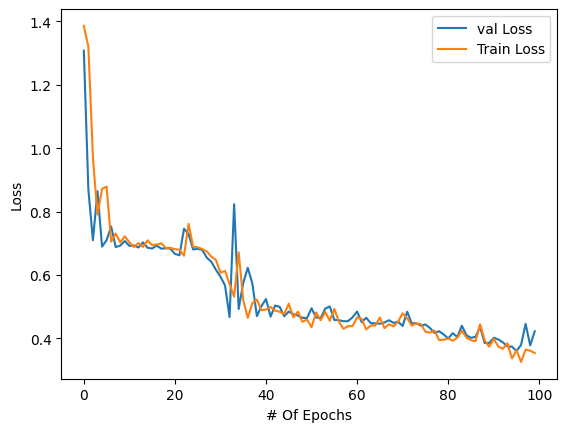

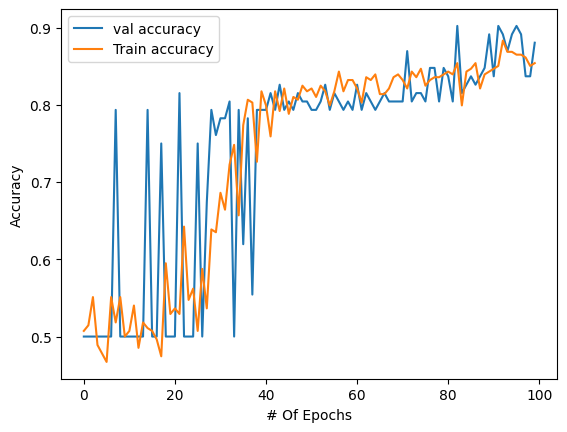

In [157]:
history_cnn = CNN_model.fit(X_train_new, y_train, epochs=100, batch_size=64, 
                            validation_data=(X_test_new,y_test), verbose=2)
# history_cnn = CNN_model.fit(X_train_new, y_train, epochs=100, batch_size=64, validation_data=(X_test_new,X_test_gen['malicious'].values), verbose=2)
#for plotting losses curve
loss_training = history_cnn.history['loss']
loss_test = history_cnn.history['val_loss']

#for plotting accyracies curve
accuracy_training = history_cnn.history['accuracy']
accuracy_test = history_cnn.history['val_accuracy']

loss_training = history_cnn.history['loss']
loss_test = history_cnn.history['val_loss']

accuracy_training = history_cnn.history['accuracy']
accuracy_test = history_cnn.history['val_accuracy']

#for Plotting
plt.plot(loss_test)
plt.plot(loss_training)

#set the titles of losses plot
plt.xlabel("# Of Epochs")
plt.ylabel("Loss")
plt.legend(['val Loss', 'Train Loss'])
plt.show()

#set the titles of accuracies plot
plt.plot(accuracy_test)
plt.plot(accuracy_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val accuracy', 'Train accuracy'])
plt.show()

In [158]:
#calculate and print the validation accuracy
scores = CNN_model.evaluate(X_train_new, y_train)
print('Final validation accuraccy: ')
print("Loss:", scores[0], " Accuracy:", scores[1])

9/9 [==============================] - 0s 52ms/step - loss: 0.3474 - accuracy: 0.8796
Final validation accuraccy: 
Loss: 0.34744584560394287  Accuracy: 0.8795620203018188


In [159]:
#calculate and print the testing accuracy
scores_test = CNN_model.evaluate(X_test_new, y_test)
print('Final testing accuraccy: ')
print("Loss:", scores_test[0], " Accuracy:", scores_test[1])

3/3 [==============================] - 0s 57ms/step - loss: 0.4223 - accuracy: 0.8804
Final testing accuraccy: 
Loss: 0.4222771227359772  Accuracy: 0.8804348111152649


In [160]:
#make the model prediction
pred = CNN_model.predict(X_test_new)

3/3 [==============================] - 0s 52ms/step


In [161]:
Y_pred = (pred > 0.5) * 1.0
Y_pred = Y_pred.reshape(y_test.shape)

In [162]:
# yy_test = X_test_gen['malicious'].values
yy_test = np.zeros_like(pred)
yy_test = (yy_test > 0.5) * 1.0

In [163]:
report = metrics.classification_report(y_test, Y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        46
           1       0.87      0.89      0.88        46

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92



In [164]:
class_labels = list(X_test_new)

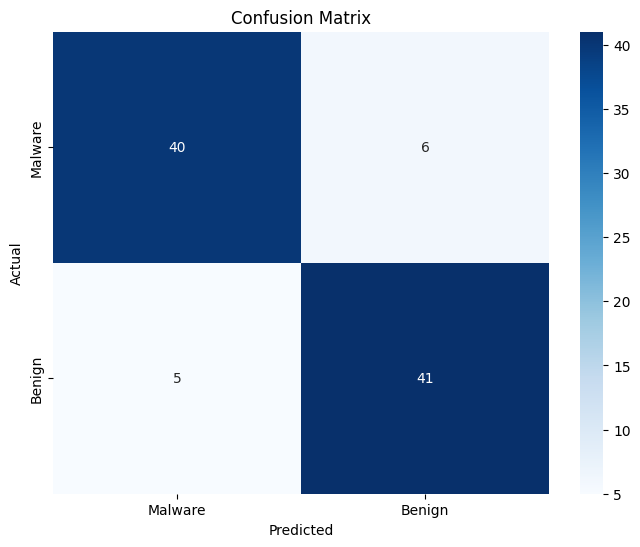

In [165]:
cm = confusion_matrix(y_test, Y_pred)

# Hiển thị confusion matrix bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malware', 'Benign'],
            yticklabels=['Malware', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [166]:
X_train_array2 = X_train.values
X_test_array2 = X_test_gen.values

# Reshape
X_train_new2 = X_train_array2.reshape(X_train_array2.shape[0], X_train_array2.shape[1], 1)
X_test_new2 = X_test_array2.reshape(X_test_array2.shape[0], X_test_array2.shape[1], 1)

In [167]:
n_features2, n_timesteps2 = X_train_new2.shape[1], X_train_new2.shape[2]

In [168]:
CNN_model2 = Cnn()
#print the model summary
CNN_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 332, 256)          768       
                                                                 
 activation_3 (Activation)   (None, 332, 256)          0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 331, 256)          131328    
                                                                 
 MaxPooling1D (MaxPooling1D  (None, 165, 256)          0         
 )                                                               
                                                                 
 Conv1D_3 (Conv1D)           (None, 163, 128)          98432     
                                                                 
 Conv1D_4 (Conv1D)           (None, 161, 128)          49280     
                                                      

Epoch 1/100
5/5 - 4s - loss: 1.3803 - accuracy: 0.4891 - val_loss: 1.3019 - val_accuracy: 0.5000 - 4s/epoch - 830ms/step
Epoch 2/100
5/5 - 2s - loss: 1.2821 - accuracy: 0.4562 - val_loss: 0.8063 - val_accuracy: 0.5000 - 2s/epoch - 340ms/step
Epoch 3/100
5/5 - 2s - loss: 0.7470 - accuracy: 0.5401 - val_loss: 0.7745 - val_accuracy: 0.5000 - 2s/epoch - 345ms/step
Epoch 4/100
5/5 - 2s - loss: 0.7791 - accuracy: 0.5000 - val_loss: 0.7026 - val_accuracy: 0.5000 - 2s/epoch - 327ms/step
Epoch 5/100
5/5 - 2s - loss: 0.7469 - accuracy: 0.4599 - val_loss: 0.6935 - val_accuracy: 0.5000 - 2s/epoch - 342ms/step
Epoch 6/100
5/5 - 2s - loss: 0.7623 - accuracy: 0.4380 - val_loss: 0.6935 - val_accuracy: 0.5000 - 2s/epoch - 335ms/step
Epoch 7/100
5/5 - 2s - loss: 0.7151 - accuracy: 0.4891 - val_loss: 0.7163 - val_accuracy: 0.5000 - 2s/epoch - 417ms/step
Epoch 8/100
5/5 - 2s - loss: 0.7398 - accuracy: 0.5255 - val_loss: 0.7145 - val_accuracy: 0.5000 - 2s/epoch - 354ms/step
Epoch 9/100
5/5 - 2s - loss: 0.7

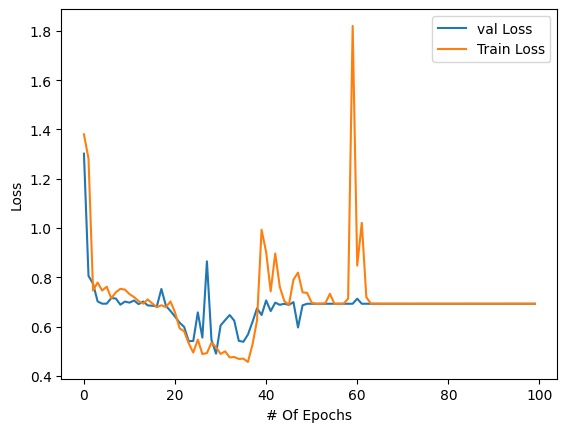

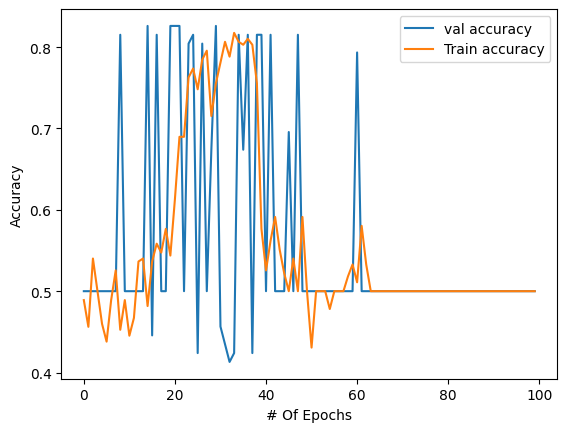

In [169]:
# history_cnn = CNN_model.fit(X_train_new, y_train, epochs=100, batch_size=64, validation_data=(X_test_new,y_test), verbose=2)
history_cnn2 = CNN_model2.fit(X_train_new2, y_train, epochs=100, batch_size=64, validation_data=(X_test_new2,y_test_gen), verbose=2)
#for plotting losses curve
loss_training2 = history_cnn2.history['loss']
loss_test2 = history_cnn2.history['val_loss']

#for plotting accyracies curve
accuracy_training2 = history_cnn2.history['accuracy']
accuracy_test2 = history_cnn2.history['val_accuracy']

loss_training2 = history_cnn2.history['loss']
loss_test2 = history_cnn2.history['val_loss']

accuracy_training2 = history_cnn2.history['accuracy']
accuracy_test2 = history_cnn2.history['val_accuracy']

#for Plotting
plt.plot(loss_test2)
plt.plot(loss_training2)

#set the titles of losses plot
plt.xlabel("# Of Epochs")
plt.ylabel("Loss")
plt.legend(['val Loss', 'Train Loss'])
plt.show()

#set the titles of accuracies plot
plt.plot(accuracy_test2)
plt.plot(accuracy_training2)
plt.xlabel("# Of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val accuracy', 'Train accuracy'])
plt.show()

In [170]:
#calculate and print the validation accuracy
scores2 = CNN_model2.evaluate(X_train_new2, y_train)
print('Final validation accuraccy: ')
print("Loss:", scores2[0], " Accuracy:", scores2[1])

9/9 [==============================] - 0s 52ms/step - loss: 0.6932 - accuracy: 0.5000
Final validation accuraccy: 
Loss: 0.6931562423706055  Accuracy: 0.5


In [171]:
#calculate and print the testing accuracy
scores_test2 = CNN_model2.evaluate(X_test_new2, y_test_gen)
print('Final testing accuraccy: ')
print("Loss:", scores_test2[0], " Accuracy:", scores_test2[1])

3/3 [==============================] - 0s 57ms/step - loss: 0.6932 - accuracy: 0.5000
Final testing accuraccy: 
Loss: 0.6931561827659607  Accuracy: 0.5


In [172]:
# make the model prediction
pred2 = CNN_model2.predict(X_test_new2)

3/3 [==============================] - 0s 51ms/step


In [173]:
Y_pred2 = (pred2 > 0.5) * 1.0
Y_pred2 = Y_pred2.reshape(y_test_gen.shape)

In [174]:
report2 = metrics.classification_report(y_test_gen, Y_pred2)
print("Classification Report:\n", report2)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.50      1.00      0.67        46

    accuracy                           0.50        92
   macro avg       0.25      0.50      0.33        92
weighted avg       0.25      0.50      0.33        92



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
class_labels2 = list(X_test_new2)

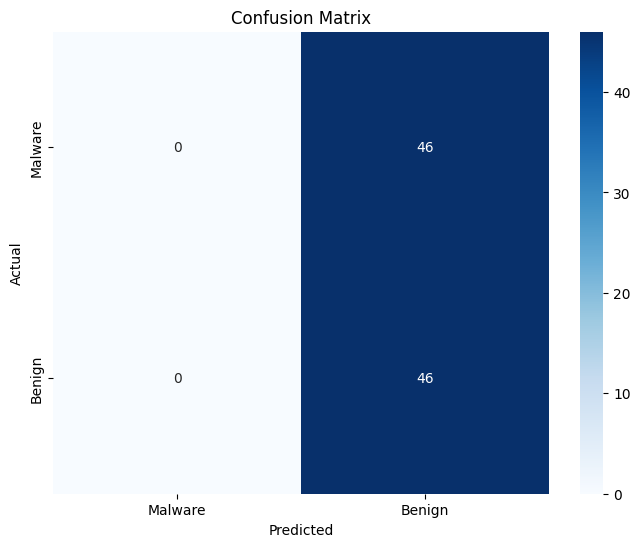

In [176]:
# import seaborn as sns
cm2 = confusion_matrix(y_test_gen, Y_pred2)

# Hiển thị confusion matrix bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malware', 'Benign'],
            yticklabels=['Malware', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()